<h2 align="center" style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Time Series Forecast of Energy Data: An Advanced Data Analytics Approach</h2>

### **Table of Contents**

- [Introduction](#Introduction)  
  - [Assessment Overview](#Assessment-Overview)  
  - [Key Findings](#Key-Findings)  
- [Install and Import Required Libraries](#Install-and-Import-Required-Libraries)  
- [Load Dataset](#Load-Dataset)
- [Data Exploration](#Data-Exploration)  
  - [Viewing First 5 Rows of Each DataFrame](#Viewing-First-5-Rows-of-Each-DataFrame)  
  - [Statistical Summary of Each DataFrame](#Statistical-Summary-of-Each-DataFrame)  
  - [Check for Missing Values](#Check-for-Missing-Values)
  - [Check for Duplicates](#Check-for-Duplicates)
  - [Data Exploration Summary](#Data-Exploration-Summary)
- [Data Wrangling](#Data-Wrangling)  

<h2 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Introduction</h2>

### **Assessment Overview**

### **Key Findings**

<h2 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Install and Import Required Libraries</h2>

The first step is to install and import of all necessary Python libraries required for data loading, preprocessing, analysis, modeling, and dashboard visualization. Libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodels`, and `tensorflow/keras` are used to support various stages of this time series forecasting project.

In [1]:
!pip install -q pmdarima numpy pandas matplotlib statsmodels tensorflow

In [2]:
import os
import time
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 50) # Display 50 rows 
pd.set_option('display.max_columns', None) # Display all columns

<h2 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Load Dataset</h2>

Here, I load the cleaned energy and weather datasets provided for the forecasting task. The `energy_df` contains hourly power generation metrics and total load actual, while the `weather_df` includes hourly weather observations across different cities. These datasets form the basis for building an integrated forecasting model that leverages both energy consumption and meteorological factors.

In [4]:
energy_df = pd.read_csv('/kaggle/input/cct3-energy-forecast-datasets/datasets/energy (1).csv')
weather_df = pd.read_csv('/kaggle/input/cct3-energy-forecast-datasets/datasets/weather.csv')

<h2 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Data Exploration</h2>

In this section, I perform preliminary data exploration to gain an initial understanding of both datasets. This includes:
- Viewing sample records to understand structure and format
- Summarizing statistical distributions
- Checking for missing values and data completeness
- Identifying any duplicate records

These steps help assess data quality and shape decisions around wrangling.

### **Viewing First 5 Rows of Each DataFrame**

In [5]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [6]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### **Statistical Summary of Each DataFrame**

In [7]:
energy_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [8]:
weather_df.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [9]:
weather_df.duplicated(keep='first').sum()

21

### **Check for Missing Values**

In [10]:
def print_missing_values(df, df_name="DataFrame"):
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    if not missing.empty:
        print(f"Columns with missing values in {df_name}: ")
        print(missing)
    else:
        print(f"No missing values found in {df_name}.")

In [11]:
print_missing_values(energy_df, "energy_df")

Columns with missing values in energy_df: 
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
gen

In [12]:
print_missing_values(weather_df, "weather_df")

No missing values found in weather_df.


### **Check for Duplicates**

In [13]:
def print_duplicate_info(df, df_name="DataFrame"):
    duplicate_count = df.duplicated().sum()

    if duplicate_count > 0:
        print(f"\n{df_name} has {duplicate_count} duplicate row(s).")
    else:
        print(f"\nNo duplicate rows found in {df_name}.")

In [14]:
print_duplicate_info(energy_df, "energy_df")


No duplicate rows found in energy_df.


In [15]:
print_duplicate_info(weather_df, "weather_df")


weather_df has 21 duplicate row(s).


<h2 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Data Wrangling</h2>

#### Overview

This section focuses on preparing the data for analysis and modeling. Key tasks include:
- Converting timestamp columns to datetime format
- Handling missing and duplicate values
- Dropping irrelevant or forecast-based columns
- Aggregating weather data across cities by timestamp
- Merging energy and weather datasets into a unified time-indexed DataFrame

These steps ensure a clean and consistent dataset that accurately reflects real-world conditions and is suitable for time series modeling.

In [16]:
# Create a copy to avoid modifying original data
energy_clean = energy_df.copy()
weather_clean = weather_df.copy()

### **Datatime Conversion**

In [17]:
# Convert time column to datetime
energy_clean['time'] = pd.to_datetime(energy_clean['time'])
energy_clean.set_index('time', inplace=True)

# Sort by datetime index
energy_clean.sort_index(inplace=True)

print(f"Original energy data shape: {energy_df.shape}")
print(f"Date range: {energy_clean.index.min()} to {energy_clean.index.max()}")

weather_clean['dt_iso'] = pd.to_datetime(weather_clean['dt_iso'])

print(f"Original weather data shape: {weather_df.shape}")
print(f"Date range: {weather_clean['dt_iso'].min()} to {weather_clean['dt_iso'].max()}")

# Set datetime as index
weather_clean.set_index('dt_iso', inplace=True)
weather_clean.sort_index(inplace=True)

Original energy data shape: (35064, 29)
Date range: 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Original weather data shape: (178396, 17)
Date range: 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00


- **Decision**: Convert string timestamps to datetime objects and set as index  
- **Justification**: Converting timestamps to datetime object enables native time-series operations (resampling, rolling windows) and ensures proper temporal alignment when merging energy and weather datasets. Critical for maintaining chronological order in forecasting models.  

### **Handle Missing Values**

In [18]:
# Identify columns with high missing values (>50% missing)
missing_pct = (energy_clean.isnull().sum() / len(energy_clean)) * 100
high_missing_cols = missing_pct[missing_pct > 50].index.tolist()

print(f"Columns with >50% missing values: {high_missing_cols}", end="\n\n")

# Drop columns with excessive missing values (>50%)
energy_clean.drop(columns=high_missing_cols, inplace=True)
print(f"Dropped {len(high_missing_cols)} columns with >50% missing values")

Columns with >50% missing values: ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead']

Dropped 2 columns with >50% missing values


In [19]:
# Handle remaining missing values
numeric_cols = energy_clean.select_dtypes(include=[np.number]).columns

# For energy generation columns
generation_cols = [col for col in numeric_cols if 'generation' in col.lower()]
for col in generation_cols:
    if energy_clean[col].isnull().sum() > 0:
        energy_clean[col] = energy_clean[col].fillna(method='ffill').fillna(method='bfill')

# For forecast and actual load columns
forecast_actual_cols = [col for col in numeric_cols if any(keyword in col.lower() 
                       for keyword in ['forecast', 'actual', 'load', 'price'])]

for col in forecast_actual_cols:
    if energy_clean[col].isnull().sum() > 0:
        energy_clean[col] = energy_clean[col].interpolate(method='linear')
        energy_clean[col] = energy_clean[col].fillna(method='ffill').fillna(method='bfill')

print(f"- Applied interpolation and forward/backward fill for missing values")
print(f"- Remaining missing values: {energy_clean.isnull().sum().sum()}")

- Applied interpolation and forward/backward fill for missing values
- Remaining missing values: 0


**High Missing Values (>50%)**
- **Decision**: Dropped columns with >50% missing (pumped storage, wind offshore forecast)
- **Justification**: Variables with extensive missing data (35,064 out of total observations) provide insufficient information for reliable forecasting models. Including them would introduce significant bias and reduce model performance, particularly critical for short time series forecasting where every data point matters.

**Generation Variables**
- **Decision**: Forward/backward fill
- **Justification**: My assumption here is that power generation systems have physical constraints that prevent instantaneous changes in output. Forward fill captures the operational reality that plants maintain relatively stable generation levels over short periods, while backward fill ensures no gaps remain. My thought process is that this approach preserves the underlying temporal patterns essential for energy forecasting.

**Load & Price Variables**
- **Decision**: Linear interpolation
- **Justification**: Another of my assumption here is that electricity demand and pricing exhibit smooth transitions due to market mechanisms and consumer behavior patterns. Linear interpolation maintains temporal continuity while providing realistic intermediate values that preserve the trend structure crucial for accurate load forecasting models.

### **Handle Duplicates**

In [20]:
print(f"Initial Data Shape: {weather_clean.shape} \n Duplicate rows found: {weather_clean.duplicated().sum()}")

# Remove duplicates - keep first occurrence
weather_clean.drop_duplicates(inplace=True)

print(f"Data shape after removing duplicates: {weather_clean.shape}")

Initial Data Shape: (178396, 16) 
 Duplicate rows found: 8622
Data shape after removing duplicates: (169774, 16)


- **Decision**: Remove 21 duplicates, keep first occurrence
- **Justification**: Duplicate weather records create artificial patterns that can bias model training and lead to overfitting. Removing duplicates ensures temporal accuracy where each timestamp has unique weather measurements, improving model generalization and preventing inflated performance metrics.

### **Drop Forecast Columns**

In [21]:
forecast_columns_to_drop = ['forecast wind onshore day ahead', 'forecast solar day ahead', 'total load forecast', 'price day ahead']

In [22]:
energy_clean.drop(columns=forecast_columns_to_drop, inplace=True)

- **Decision**: Drop forecast-related columns (`forecast wind onshore day ahead`, `forecast solar day ahead`, `total load forecast`, `price day ahead`).
- **Justification**: These features represent external predictive signals, which may not be available in real-world inference scenarios or during backtesting. Including them risks **data leakage**, especially when my goal is to build a model that forecasts energy demand/load independently. Removing these columns ensures the model only relies on actual historical observations and preserves the integrity of the forecasting task.

### **Merge DataFrames**

In [23]:
# Convert both indices to UTC first, then remove timezone info
energy_clean.index = pd.to_datetime(energy_clean.index, utc=True).tz_convert(None)
weather_clean.index = pd.to_datetime(weather_clean.index, utc=True).tz_convert(None)

In [24]:
# Aggregate weather data using mean across all cities per timestamp
weather_agg = (
    weather_clean.groupby(weather_clean.index).agg({
        'temp': 'mean',
        'temp_min': 'mean',
        'temp_max': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'wind_deg': 'mean',
        'rain_1h': 'mean',
        'rain_3h': 'mean',
        'snow_3h': 'mean',
        'clouds_all': 'mean'
    })
)

# Merge using datetime index
merged_df = energy_clean.join(weather_agg, how='inner')

In [25]:
merged_df.head(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,total load actual,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,25385.0,65.41,272.491463,272.491463,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0
2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,24382.0,64.92,269.763500,269.763500,269.763500,1035.0,97.0,0.0,229.0,0.0,0.0,0.0,0.0


- **Decision**: Aggregate weather data across all five Spanish cities using the **mean** of each numerical weather feature, then merge it with the national energy data by aligning on their **shared datetime index**.

- **Justification**: The energy dataset is recorded at a national level and indexed by timestamp, while the weather data includes multiple cities also indexed by timestamp. To create a consistent and comparable dataset, I computed the **mean weather conditions** across all cities per hour. 

- **Hypothesis**: I’m using the **mean** of weather variables (e.g., temperature, humidity, wind speed) across cities because I hypothesize that **national energy load reflects average comfort levels and environmental conditions** across the country, rather than being driven by local extremes in any single city.

<h2 style="background-color:#2D3436;color:white;border-radius:8px;padding:15px">Exploratory Data Analysis</h2>

In [26]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### **1. Overall Data Overview and Derived Time Features**

In [27]:
print(f"Dataset shape: {merged_df.shape}")
print(f"Date range: {merged_df.index.min()} to {merged_df.index.max()}")
print(f"Total duration: {merged_df.index.max() - merged_df.index.min()}")

Dataset shape: (34562, 33)
Date range: 2014-12-31 23:00:00 to 2018-12-31 22:00:00
Total duration: 1460 days 23:00:00


In [28]:
# Create derived time features
merged_df['hour'] = merged_df.index.hour
merged_df['day_of_week'] = merged_df.index.dayofweek
merged_df['month'] = merged_df.index.month
merged_df['day_of_year'] = merged_df.index.dayofyear

### **2. Target Variable Analysis (Total Load Actual)**

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Target Variable Analysis - Total Load Actual', fontsize=16, fontweight='bold')

# Time series plot
axes[0].plot(merged_df.index, merged_df['total load actual'], alpha=0.7, linewidth=0.5)
axes[0].set_title('Total Load Actual Over Time', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Load (MW)')
axes[0].tick_params(axis='x', rotation=45)

# Distribution plot
sns.histplot(merged_df['total load actual'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total Load Actual', fontsize=12)
axes[1].set_xlabel('Total Load (MW)')

plt.tight_layout()
plt.show()

**Key Observations:**

The time series plot reveals distinct seasonal patterns in energy demand over the 4-year period (2015-2018), with higher loads consistently occurring during winter months and lower loads during summer periods. The stability of these patterns suggests strong time-dependent behavior that should be captured by our forecasting models.

The distribution plot shows a bimodal pattern with two distinct peaks around 25,000 MW and 33,000 MW, suggesting the presence of two dominant demand states, likely corresponding to seasonal variations (summer vs. winter demand patterns). The distribution is approximately normal but slightly right-skewed, with the majority of observations falling between 20,000-38,000 MW.

### **3. Seasonal Patterns Analysis**

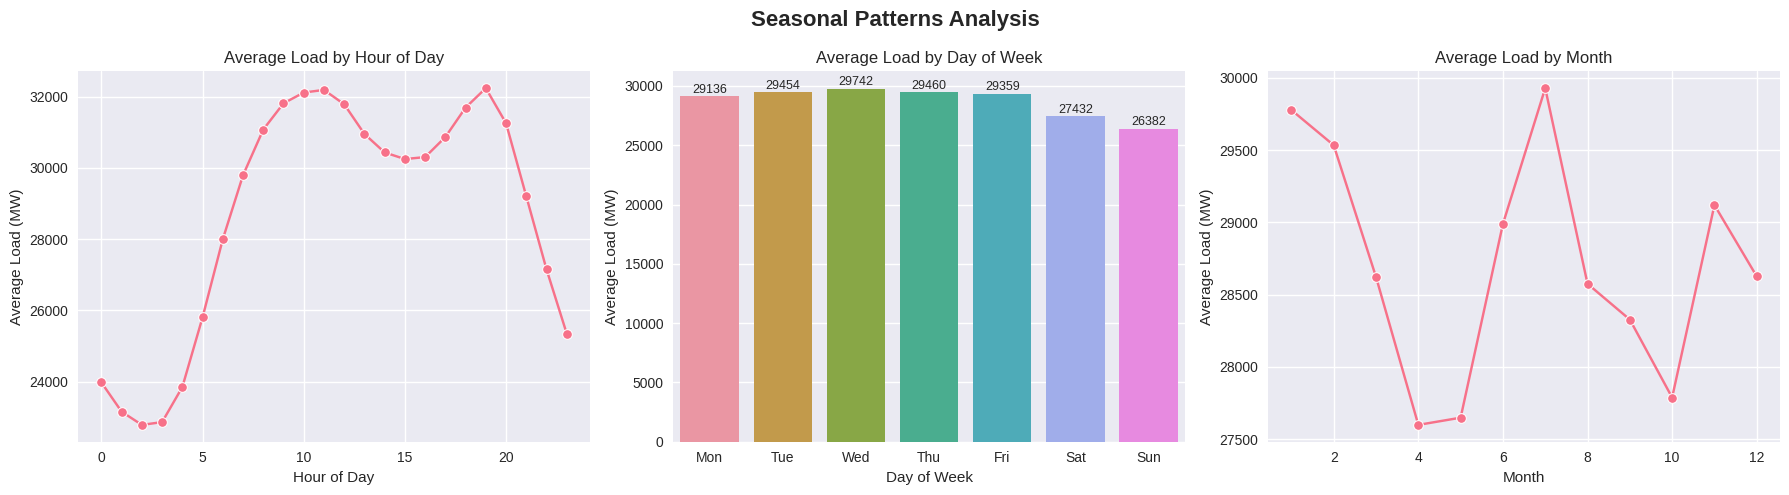

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Seasonal Patterns Analysis', fontsize=16, fontweight='bold')

# Hourly patterns
hourly_avg = merged_df.groupby('hour')['total load actual'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', ax=axes[0])
axes[0].set_title('Average Load by Hour of Day', fontsize=12)
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Load (MW)')

# Daily patterns
daily_avg = merged_df.groupby('day_of_week')['total load actual'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
barplot = sns.barplot(x=days, y=daily_avg.values, ax=axes[1])
axes[1].set_title('Average Load by Day of Week', fontsize=12)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Load (MW)')

# Add count labels on top of bars
for i, val in enumerate(daily_avg.values):
    axes[1].text(i, val + 50, f'{val:.0f}', ha='center', va='bottom', fontsize=9)

# Monthly patterns
monthly_avg = merged_df.groupby('month')['total load actual'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', ax=axes[2])
axes[2].set_title('Average Load by Month', fontsize=12)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average Load (MW)')

plt.tight_layout()
plt.show()

**Key Observations:**

The hourly pattern reveals a distinct double-peak structure with maximum demand occurring around 10 AM and 8 PM (~32,000 MW), corresponding to morning and evening activity peaks. Energy consumption drops to its lowest point during early morning hours (3-5 AM) at approximately 23,000 MW, reflecting reduced nighttime activity.

Weekly patterns show relatively stable demand across weekdays (Monday-Friday) averaging around 29,000-29,500 MW, with slight reductions during weekends. Sunday exhibits the lowest weekly demand at 26,382 MW, indicating reduced commercial and industrial activity.

Monthly analysis demonstrates strong seasonal variations with peak consumption during winter months (December-February reaching ~30,000 MW) and minimum demand during summer months (May-August dropping to ~27,500 MW). This 2,500 MW seasonal difference highlights the significant impact of heating and cooling loads on overall energy demand.

### **4. Weather Variable Analysis**

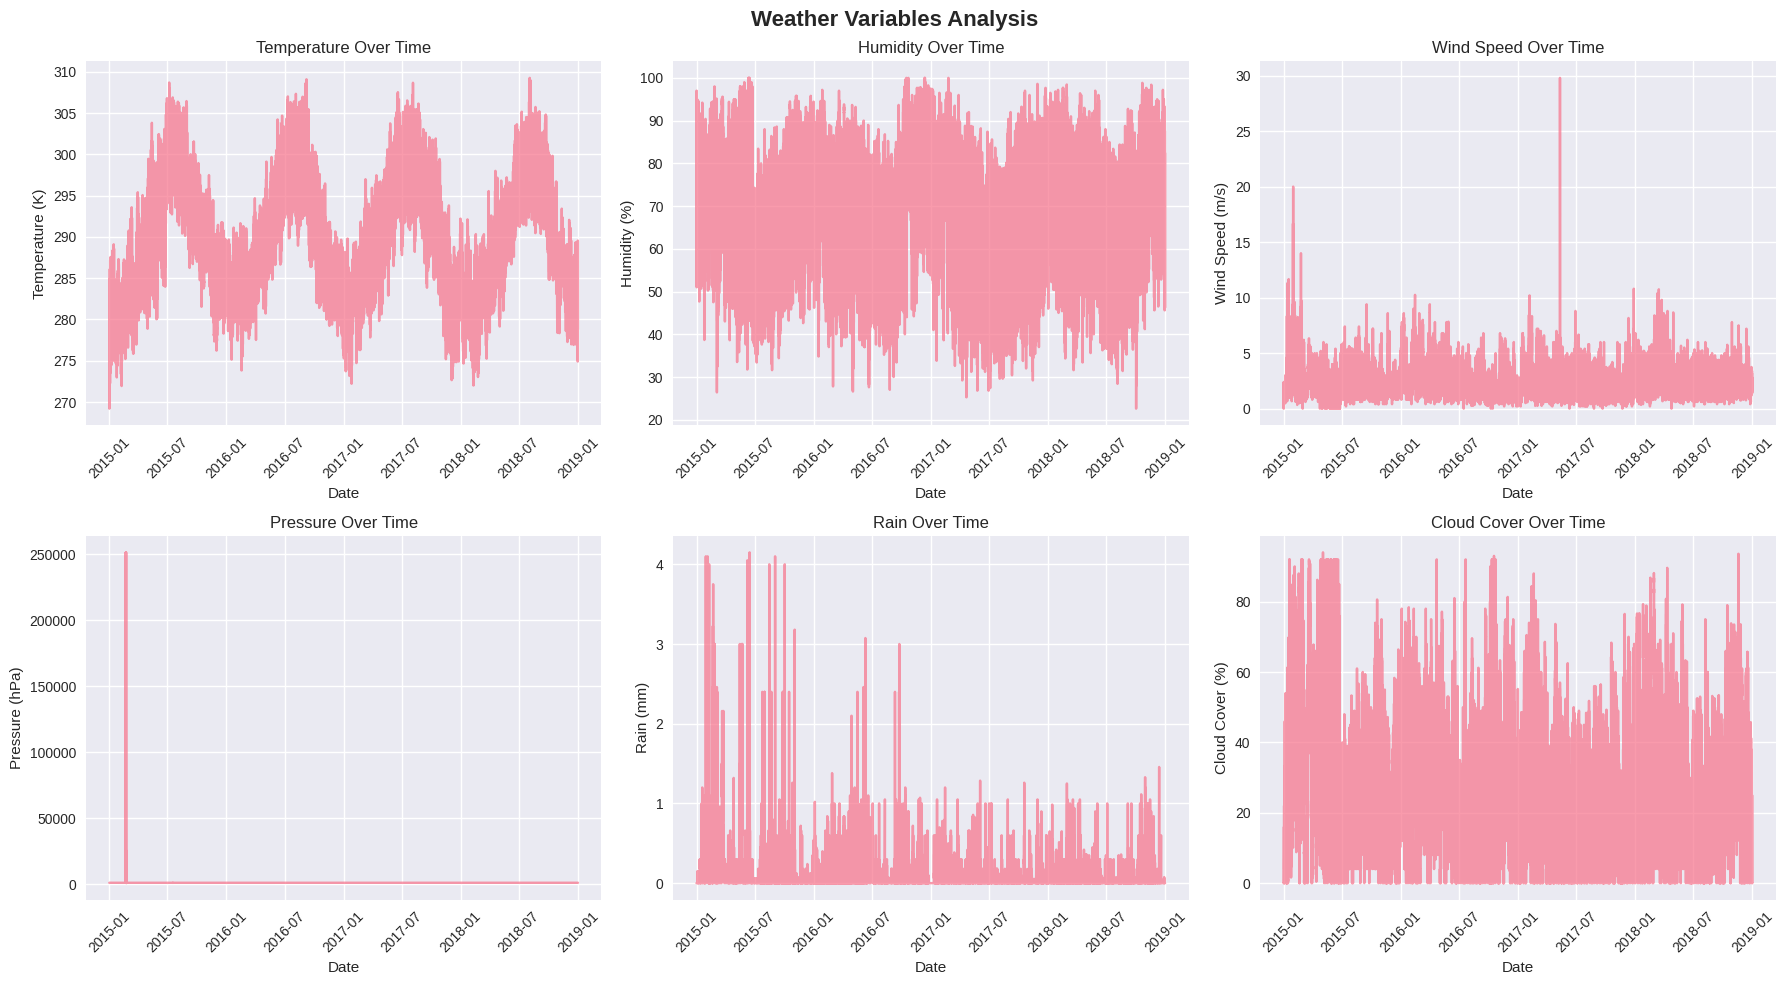

In [31]:
weather_vars = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Weather Variables Analysis', fontsize=16, fontweight='bold')

# Temperature
sns.lineplot(data=merged_df, x=merged_df.index, y='temp', alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Over Time', fontsize=12)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Temperature (K)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Humidity
sns.lineplot(data=merged_df, x=merged_df.index, y='humidity', alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title('Humidity Over Time', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Humidity (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Wind Speed
sns.lineplot(data=merged_df, x=merged_df.index, y='wind_speed', alpha=0.7, ax=axes[0, 2])
axes[0, 2].set_title('Wind Speed Over Time', fontsize=12)
axes[0, 2].set_xlabel('Date')
axes[0, 2].set_ylabel('Wind Speed (m/s)')
axes[0, 2].tick_params(axis='x', rotation=45)

# Pressure
sns.lineplot(data=merged_df, x=merged_df.index, y='pressure', alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Pressure Over Time', fontsize=12)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Pressure (hPa)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Rain
sns.lineplot(data=merged_df, x=merged_df.index, y='rain_1h', alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Rain Over Time', fontsize=12)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Rain (mm)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Cloud Cover
sns.lineplot(data=merged_df, x=merged_df.index, y='clouds_all', alpha=0.7, ax=axes[1, 2])
axes[1, 2].set_title('Cloud Cover Over Time', fontsize=12)
axes[1, 2].set_xlabel('Date')
axes[1, 2].set_ylabel('Cloud Cover (%)')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Key Observations:**

Temperature exhibits clear seasonal cycles with consistent annual patterns, ranging from winter lows around 275K to summer peaks near 310K. The cyclical nature directly mirrors the energy demand patterns observed earlier, confirming some relationship between temperature and energy consumption. I will check the correlation between these two in the next section.

Humidity shows inverse seasonal behavior to temperature, with higher values during cooler months (80-100%) and lower values in warmer periods (30-60%). Wind speed remains relatively stable around 2-8 m/s with occasional spikes up to 30 m/s, indicating sporadic high-wind events.

Pressure displays some anomalous extreme values that require data cleaning attention before modeling. Rainfall patterns show seasonal concentration with higher precipitation during certain periods, while cloud cover varies between 0-100% throughout the dataset with no clear seasonal trend.

The weather variables demonstrate sufficient variability and seasonal patterns that should provide valuable predictive power for energy load forecasting, particularly temperature and humidity which show strong inverse correlation with each other and clear seasonal alignment with energy demand patterns.

### **5. Correlation Analysis**

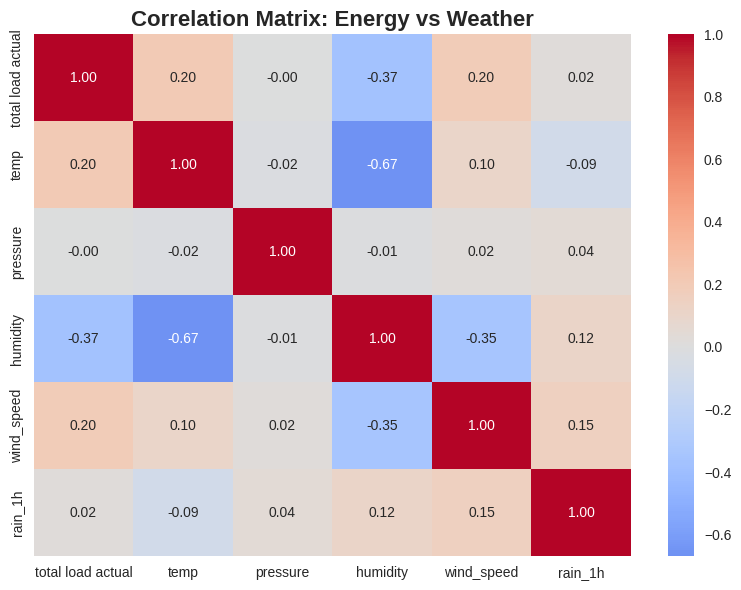

In [32]:
correlations = merged_df.corr()['total load actual'].sort_values(ascending=False)

fig = plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix: Energy vs Weather', fontsize=16, fontweight='bold')

# Select key variables for correlation
corr_vars = ['total load actual', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h']
corr_matrix = merged_df[corr_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')

plt.tight_layout()
plt.show()

**Key Observations:**

The correlation analysis reveals a moderate positive relationship between temperature and total load actual (r=0.20), which is weaker than expected but still significant for forecasting purposes. The strongest weather-related correlation is with humidity, showing a moderate negative correlation (r=-0.37), indicating that higher humidity periods could correspond to lower energy demand. I am are careful not to interprete this as causation. 

Temperature and humidity demonstrate a strong negative correlation (r=-0.67), confirming their inverse seasonal relationship observed in the time series plots. This suggests that both variables capture complementary aspects of seasonal energy demand patterns.

Other weather variables show weaker correlations: pressure (r=-0.00), wind speed (r=0.20), and rainfall (r=0.02) have minimal direct linear relationships with energy load. However, these variables may still contribute to forecasting accuracy through non-linear interactions and combined effects in machine learning models.

### **6. Generation Mix Analysis**

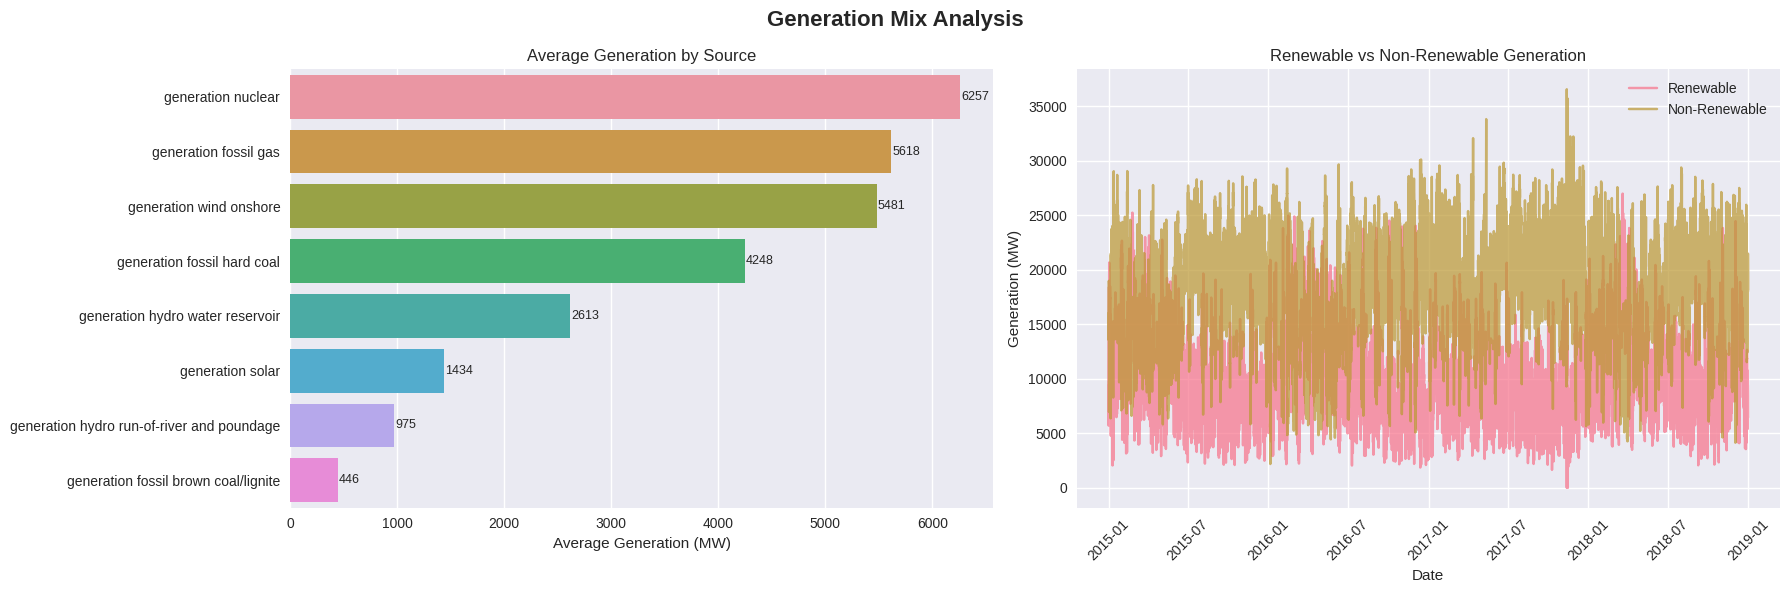

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Generation Mix Analysis', fontsize=16, fontweight='bold')

# Average generation by source
generation_cols = [col for col in merged_df.columns if 'generation' in col and 'consumption' not in col]
top_generation = merged_df[generation_cols].mean().sort_values(ascending=False).head(8)
sns.barplot(x=top_generation.values, y=top_generation.index, ax=axes[0])
axes[0].set_title('Average Generation by Source', fontsize=12)
axes[0].set_xlabel('Average Generation (MW)')

# Add value labels to bars
for i, val in enumerate(top_generation.values):
    axes[0].text(val + 10, i, f'{val:.0f}', va='center', fontsize=9)

# Renewable vs Non-renewable
renewable_cols = ['generation solar', 'generation wind onshore', 'generation wind offshore', 
                  'generation hydro run-of-river and poundage', 'generation hydro water reservoir']
renewable_total = merged_df[renewable_cols].sum(axis=1)
non_renewable_total = merged_df['total load actual'] - renewable_total

axes[1].plot(merged_df.index, renewable_total, label='Renewable', alpha=0.7)
axes[1].plot(merged_df.index, non_renewable_total, label='Non-Renewable', alpha=0.7)
axes[1].set_title('Renewable vs Non-Renewable Generation', fontsize=12)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Generation (MW)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Key Observations:**

The energy generation portfolio is dominated by nuclear power (6,257 MW average), followed closely by fossil gas (5,618 MW) and wind onshore (5,481 MW), indicating a balanced mix of baseload and variable renewable sources. Fossil hard coal contributes significantly (4,248 MW), while hydro water reservoir (2,613 MW) and solar (1,434 MW) provide additional renewable capacity.

The renewable vs non-renewable generation time series reveals that non-renewable sources consistently provide the majority of electricity supply (approximately 20,000-25,000 MW), with renewable generation contributing a smaller but variable portion (5,000-15,000 MW).

### **7. Stationarity Analysis**

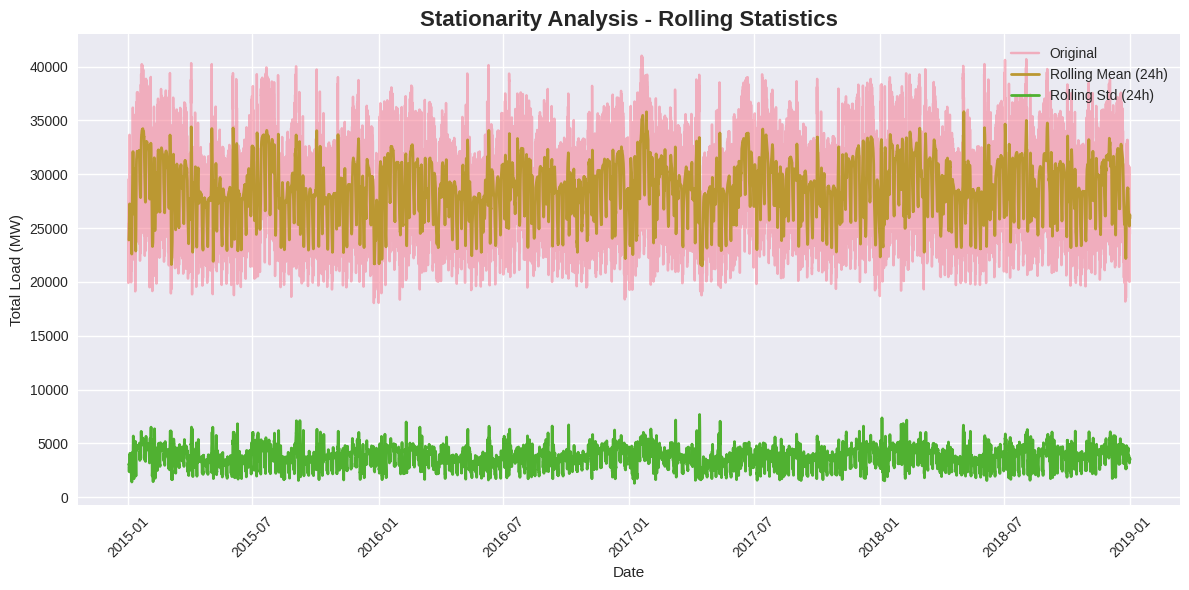

In [34]:
fig = plt.figure(figsize=(12, 6))
plt.title('Stationarity Analysis - Rolling Statistics', fontsize=16, fontweight='bold')

# Rolling statistics
rolling_mean = merged_df['total load actual'].rolling(window=24).mean()
rolling_std = merged_df['total load actual'].rolling(window=24).std()

plt.plot(merged_df.index, merged_df['total load actual'], alpha=0.5, label='Original')
plt.plot(merged_df.index, rolling_mean, label='Rolling Mean (24h)', linewidth=2)
plt.plot(merged_df.index, rolling_std, label='Rolling Std (24h)', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Load (MW)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Key Observations:**

The 24-hour rolling mean and rolling standard deviation exhibit clear time-dependent trends, confirming the series is **non-stationary** and violates ARIMA model assumptions. The rolling mean demonstrates consistent seasonal oscillations between 25,000-32,000 MW with repeating peaks and troughs at regular intervals, indicating strong daily and seasonal cycles.

The rolling standard deviation shows periods of varying volatility (3,000-8,000 MW). Both statistics display predictable seasonal patterns over the 4-year period, confirming the need for explicit seasonal modeling.

**Model Implications and Justifications:**
- **SARIMA**: Seasonal differencing to handle the observed seasonality and non-stationarity
- **Neural Networks**: LSTM models can automatically learn these temporal dependencies without requiring manual stationarity transformations